In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

#### Importing the dataset

In [2]:
df = pd.read_csv('/kaggle/input/laptop-prices/laptop_prices.csv')

# Tüm sütunları ve satırları tam göster
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


#### Analyzing the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [4]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [5]:
print("Missing data:\n",  df.isnull().sum()) # pandas'ın özelliği

Missing data:
 Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [6]:
df.nunique()

Company                  19
Product                 618
TypeName                  6
Inches                   18
Ram                       9
OS                        9
Weight                  171
Price_euros             791
Screen                    4
ScreenW                  13
ScreenH                  10
Touchscreen               2
IPSpanel                  2
RetinaDisplay             2
CPU_company               3
CPU_freq                 25
CPU_model                93
PrimaryStorage           13
SecondaryStorage          6
PrimaryStorageType        4
SecondaryStorageType      4
GPU_company               4
GPU_model               110
dtype: int64

#### Encoding

In [7]:
df = pd.get_dummies(df, columns=['TypeName', 'OS', 'Screen', 'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company'])
df.head()

,Company,Product,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,Apple,MacBook Pro,13.3,8,1.37,1339.69,2560,1600,No,Yes,Yes,2.3,Core i5,128,0,Iris Plus Graphics 640,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1,Apple,Macbook Air,13.3,8,1.34,898.94,1440,900,No,No,No,1.8,Core i5,128,0,HD Graphics 6000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,HP,250 G6,15.6,8,1.86,575.00,1920,1080,No,No,No,2.5,Core i5 7200U,256,0,HD Graphics 620,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
3,Apple,MacBook Pro,15.4,16,1.83,2537.45,2880,1800,No,Yes,Yes,2.7,Core i7,512,0,Radeon Pro 455,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False
4,Apple,MacBook Pro,13.3,8,1.37,1803.60,2560,1600,No,Yes,Yes,3.1,Core i5,256,0,Iris Plus Graphics 650,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1275 non-null   object 
 1   Product                           1275 non-null   object 
 2   Inches                            1275 non-null   float64
 3   Ram                               1275 non-null   int64  
 4   Weight                            1275 non-null   float64
 5   Price_euros                       1275 non-null   float64
 6   ScreenW                           1275 non-null   int64  
 7   ScreenH                           1275 non-null   int64  
 8   Touchscreen                       1275 non-null   object 
 9   IPSpanel                          1275 non-null   object 
 10  RetinaDisplay                     1275 non-null   object 
 11  CPU_freq                          1275 non-null   float64
 12  CPU_mo

In [9]:
le = LabelEncoder()

df['Company'] = le.fit_transform(df['Company'])
df['Product'] = le.fit_transform(df['Product'])
df['Touchscreen'] = le.fit_transform(df['Touchscreen'])
df['IPSpanel'] = le.fit_transform(df['IPSpanel'])
df['RetinaDisplay'] = le.fit_transform(df['RetinaDisplay'])
df['CPU_model'] = le.fit_transform(df['CPU_model'])
df['GPU_model'] = le.fit_transform(df['GPU_model'])

df.head()

,Company,Product,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,1,300,13.3,8,1.37,1339.69,2560,1600,0,1,1,2.3,40,128,0,60,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1,1,301,13.3,8,1.34,898.94,1440,900,0,0,0,1.8,40,128,0,53,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,7,50,15.6,8,1.86,575.00,1920,1080,0,0,0,2.5,46,256,0,55,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
3,1,300,15.4,16,1.83,2537.45,2880,1800,0,1,1,2.7,54,512,0,80,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False
4,1,300,13.3,8,1.37,1803.60,2560,1600,0,1,1,3.1,40,256,0,61,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company                           1275 non-null   int64  
 1   Product                           1275 non-null   int64  
 2   Inches                            1275 non-null   float64
 3   Ram                               1275 non-null   int64  
 4   Weight                            1275 non-null   float64
 5   Price_euros                       1275 non-null   float64
 6   ScreenW                           1275 non-null   int64  
 7   ScreenH                           1275 non-null   int64  
 8   Touchscreen                       1275 non-null   int64  
 9   IPSpanel                          1275 non-null   int64  
 10  RetinaDisplay                     1275 non-null   int64  
 11  CPU_freq                          1275 non-null   float64
 12  CPU_mo

#### Correlation Matrix

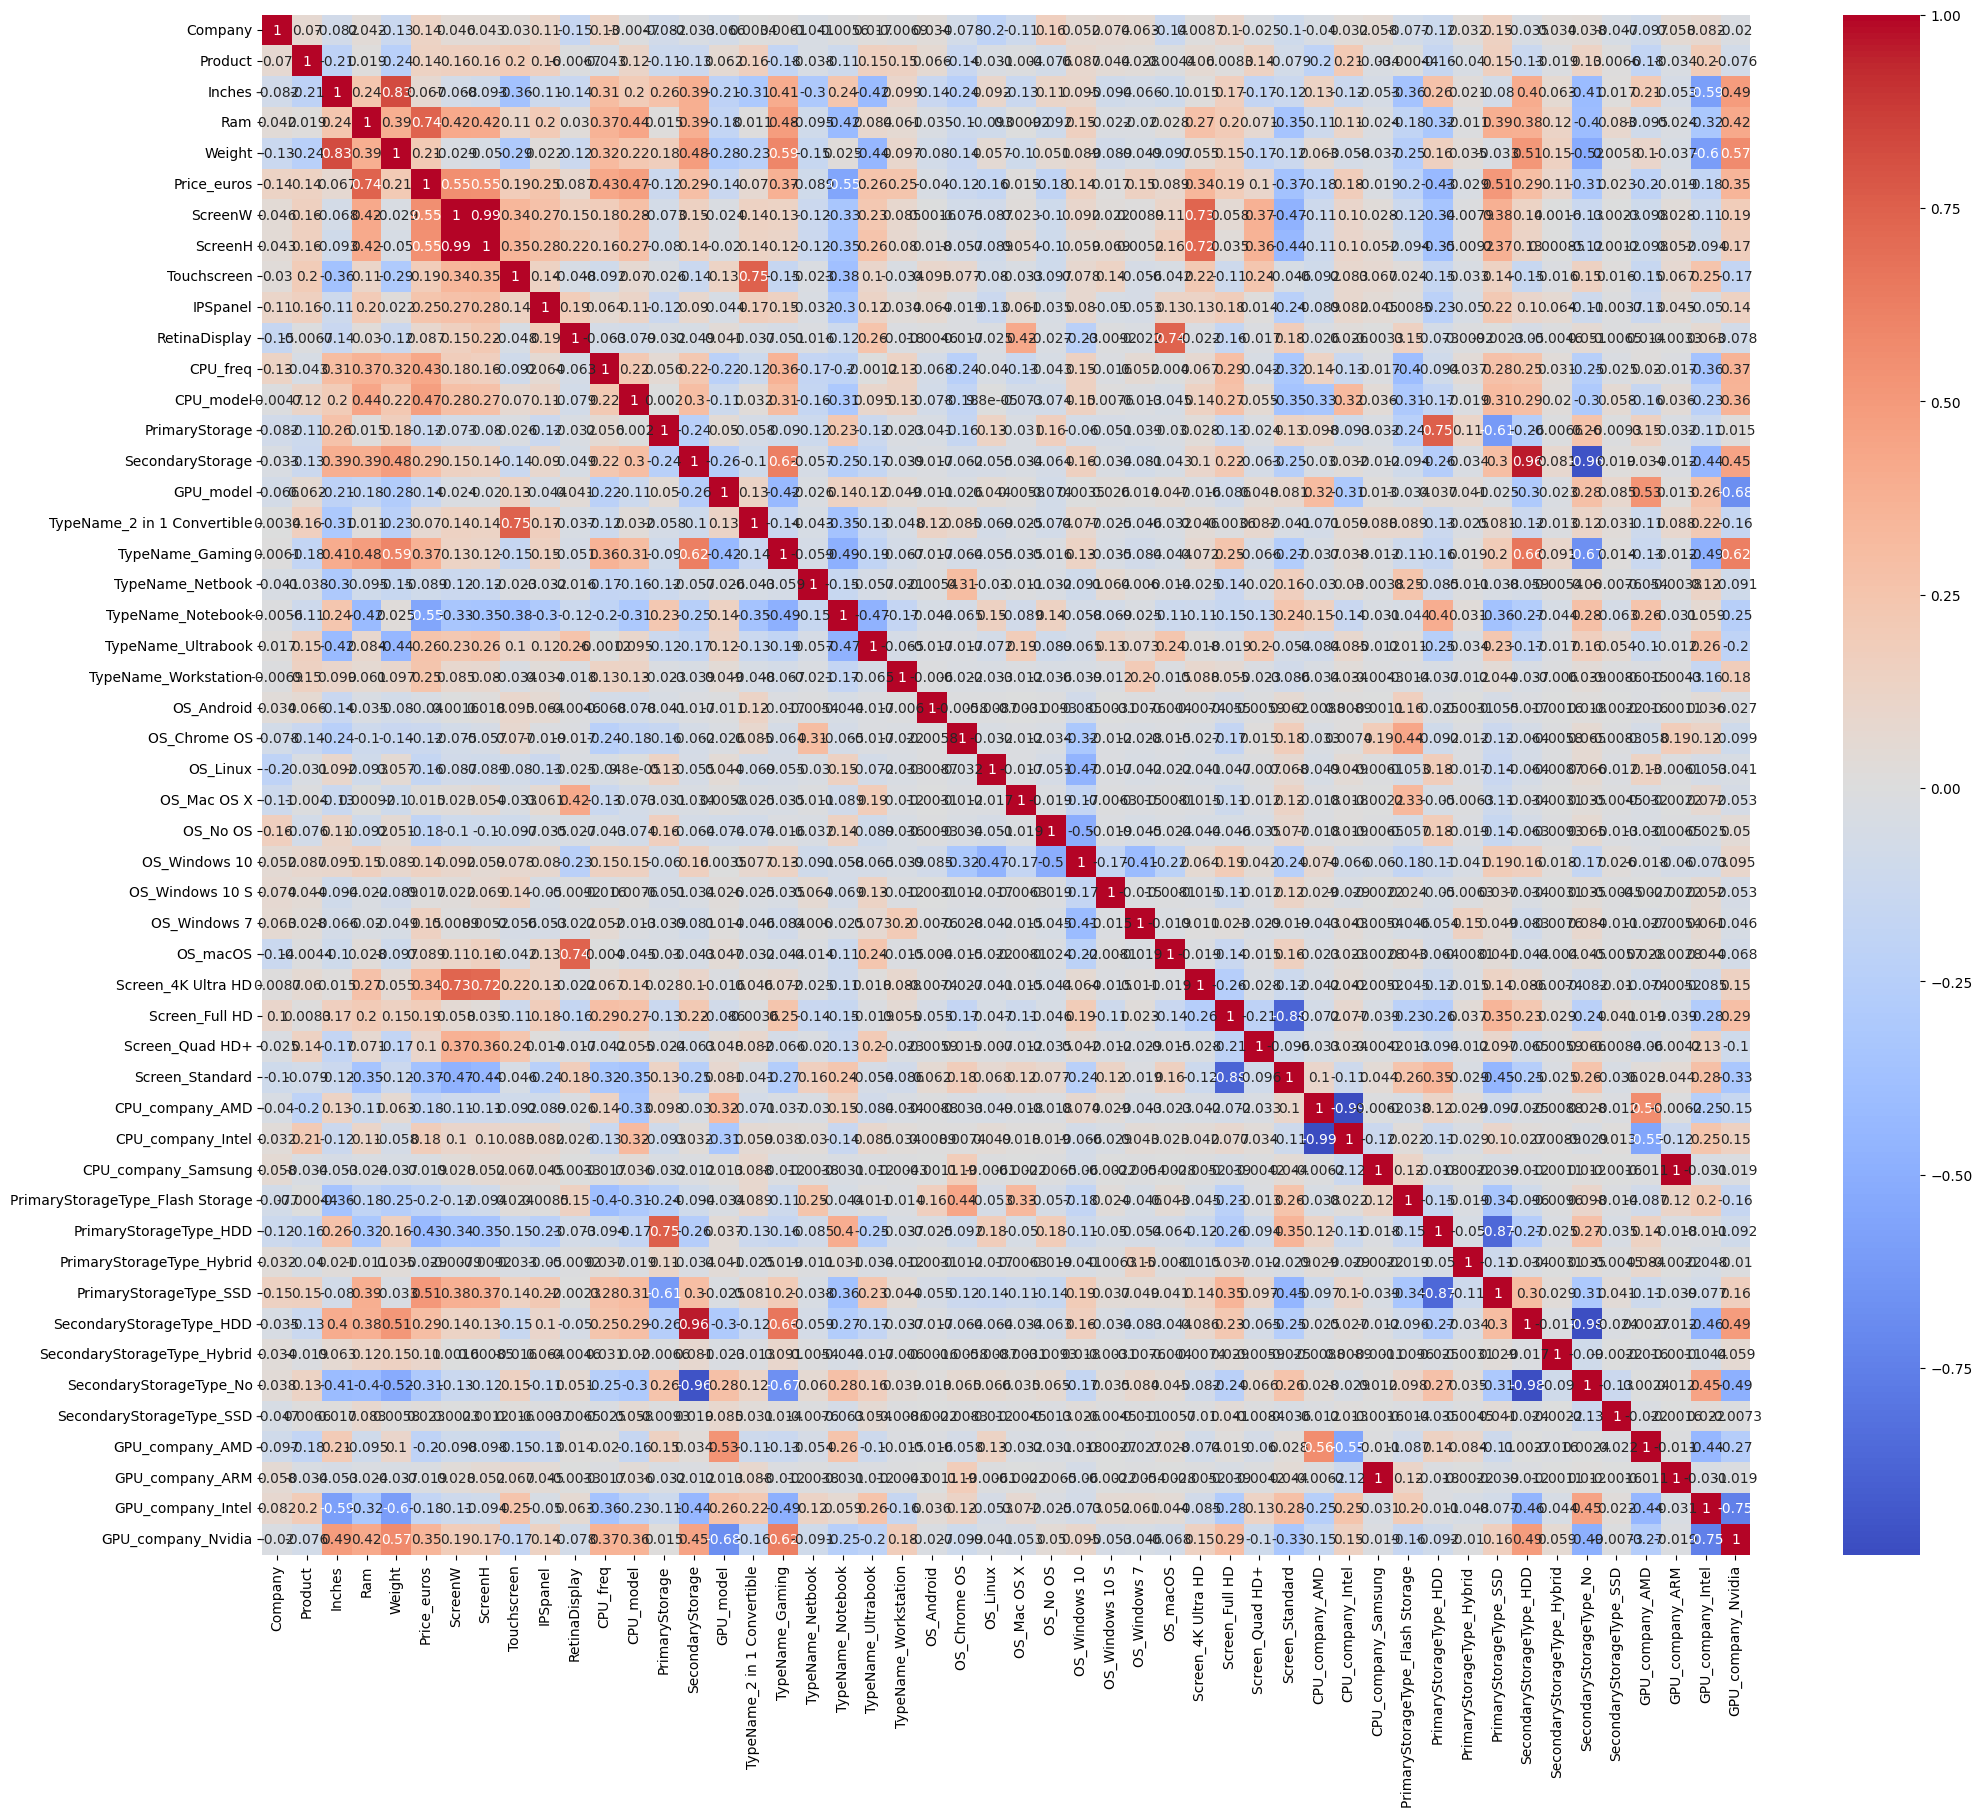

In [11]:
correlation_matrix=df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()

#### Splitting dataset into X and Y

In [12]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [13]:
X

,Company,Product,Inches,Ram,Weight,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OS_Android,OS_Chrome OS,OS_Linux,OS_Mac OS X,OS_No OS,OS_Windows 10,OS_Windows 10 S,OS_Windows 7,OS_macOS,Screen_4K Ultra HD,Screen_Full HD,Screen_Quad HD+,Screen_Standard,CPU_company_AMD,CPU_company_Intel,CPU_company_Samsung,PrimaryStorageType_Flash Storage,PrimaryStorageType_HDD,PrimaryStorageType_Hybrid,PrimaryStorageType_SSD,SecondaryStorageType_HDD,SecondaryStorageType_Hybrid,SecondaryStorageType_No,SecondaryStorageType_SSD,GPU_company_AMD,GPU_company_ARM,GPU_company_Intel,GPU_company_Nvidia
0,1,300,13.3,8,1.37,2560,1600,0,1,1,2.3,40,128,0,60,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1,1,301,13.3,8,1.34,1440,900,0,0,0,1.8,40,128,0,53,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,7,50,15.6,8,1.86,1920,1080,0,0,0,2.5,46,256,0,55,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
3,1,300,15.4,16,1.83,2880,1800,0,1,1,2.7,54,512,0,80,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False
4,1,300,13.3,8,1.37,2560,1600,0,1,1,3.1,40,256,0,61,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,580,14.0,4,1.80,1920,1080,1,1,0,2.5,55,128,0,49,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1271,10,588,13.3,16,1.30,3200,1800,1,1,0,2.5,55,512,0,49,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False
1272,10,196,14.0,2,1.50,1366,768,0,0,0,1.6,20,64,0,42,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
1273,7,2,15.6,6,2.19,1366,768,0,0,0,2.5,55,1024,0,92,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False


In [14]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1270     638.00
1271    1499.00
1272     229.00
1273     764.00
1274     369.00
Name: Price_euros, Length: 1275, dtype: float64

#### Splitting dataset into train and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

#### Building the models

In [16]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.7463860358495186

In [17]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2_score(y_test, y_pred)

0.6105320205035494

In [18]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.7932563948843515